In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix


In [71]:
df = pd.read_csv(r"../../dataset/output.csv")

In [72]:
df

,Number,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,M,43.2555,30.8421,25.9025,6.3,Yes
1,2,F,45.6033,28.1900,26.2067,13.5,No
2,3,F,45.0107,28.9677,26.0215,11.7,No
3,4,F,44.5398,28.9899,26.4703,13.5,No
4,5,M,43.2870,30.6972,26.0158,12.4,No
...,...,...,...,...,...,...,...
99,100,F,49.9999,29.2860,20.7141,14.5,Yes
100,101,M,42.2324,30.6757,27.0919,6.3,Yes
101,102,F,45.6064,31.9084,22.4852,12.7,No
102,103,M,45.2095,29.2769,25.5136,13.4,No


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Number        104 non-null    int64  
 1   Sex           104 non-null    object 
 2   %Red Pixel    104 non-null    float64
 3   %Green pixel  104 non-null    float64
 4   %Blue pixel   104 non-null    float64
 5   Hb            104 non-null    float64
 6   Anaemic       104 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 5.8+ KB


In [74]:
df.describe()

,Number,%Red Pixel,%Green pixel,%Blue pixel,Hb
count,104.000000,104.000000,104.000000,104.000000,104.000000
mean,52.500000,45.654175,28.875507,25.470325,12.150962
std,30.166206,2.816294,1.554275,1.984671,2.512957
min,1.000000,38.796800,25.140300,19.541300,2.800000
25%,26.750000,43.911375,27.871300,24.896425,10.650000
50%,52.500000,45.385350,28.948750,25.953200,12.600000
75%,78.250000,46.968325,29.887275,26.721600,14.000000
max,104.000000,54.647800,32.368100,29.841400,16.300000


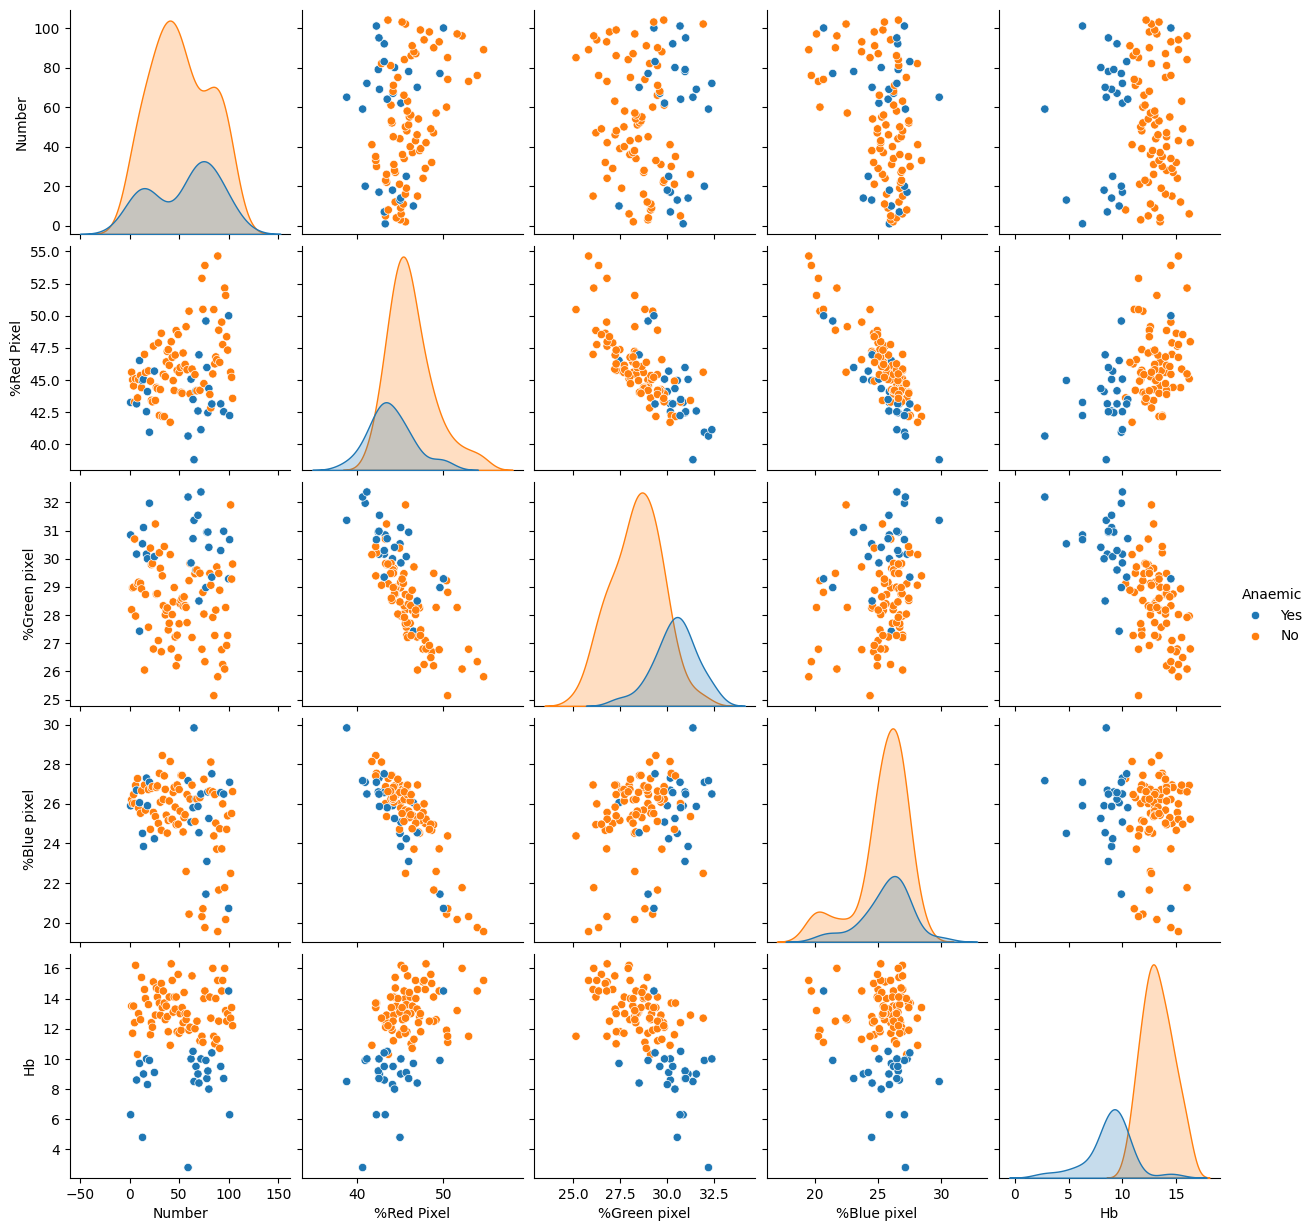

In [75]:
sb.pairplot(df, hue="Anaemic")

In [76]:
df = df.drop("Number", axis=1)

In [77]:
df

,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,M,43.2555,30.8421,25.9025,6.3,Yes
1,F,45.6033,28.1900,26.2067,13.5,No
2,F,45.0107,28.9677,26.0215,11.7,No
3,F,44.5398,28.9899,26.4703,13.5,No
4,M,43.2870,30.6972,26.0158,12.4,No
...,...,...,...,...,...,...
99,F,49.9999,29.2860,20.7141,14.5,Yes
100,M,42.2324,30.6757,27.0919,6.3,Yes
101,F,45.6064,31.9084,22.4852,12.7,No
102,M,45.2095,29.2769,25.5136,13.4,No


In [78]:
df.values

array([['M', 43.2555, 30.8421, 25.9025, 6.3, 'Yes'],
       ['F', 45.6033, 28.19, 26.2067, 13.5, 'No'],
       ['F ', 45.0107, 28.9677, 26.0215, 11.7, 'No'],
       ['F', 44.5398, 28.9899, 26.4703, 13.5, 'No'],
       ['M ', 43.287, 30.6972, 26.0158, 12.4, 'No'],
       ['M', 45.0994, 27.9645, 26.9361, 16.2, 'No'],
       ['F', 43.1457, 30.1628, 26.6915, 8.6, 'Yes'],
       ['F ', 43.6103, 29.1099, 27.2798, 10.3, 'No'],
       ['F', 45.0423, 29.166, 25.7918, 13.0, 'No'],
       ['F', 46.5143, 27.4282, 26.0575, 9.7, 'Yes'],
       ['F', 45.3506, 29.1248, 25.5246, 12.6, 'No'],
       ['F', 44.4062, 28.9298, 26.664, 15.4, 'No'],
       ['F', 44.9642, 30.5279, 24.5079, 4.8, 'Yes'],
       ['M ', 45.0484, 31.1049, 23.8467, 9.0, 'Yes'],
       ['M ', 46.9942, 26.0496, 26.9562, 14.6, 'No'],
       ['M', 45.5842, 28.7311, 25.6848, 14.0, 'No'],
       ['F', 42.5358, 30.1604, 27.3039, 10.0, 'Yes'],
       ['F', 44.0957, 29.9973, 25.907, 8.3, 'Yes'],
       ['F', 45.7104, 27.5693, 26.7204, 13.6, 

In [79]:
df['Sex'] = df['Sex'].str.strip() 

In [80]:
# Initialize the label encoder
label_encoder = LabelEncoder()

# List of columns to encode
columns_to_encode = ['Sex']

# Apply label encoding to each column
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

In [81]:
df

,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,43.2555,30.8421,25.9025,6.3,Yes
1,0,45.6033,28.1900,26.2067,13.5,No
2,0,45.0107,28.9677,26.0215,11.7,No
3,0,44.5398,28.9899,26.4703,13.5,No
4,1,43.2870,30.6972,26.0158,12.4,No
...,...,...,...,...,...,...
99,0,49.9999,29.2860,20.7141,14.5,Yes
100,1,42.2324,30.6757,27.0919,6.3,Yes
101,0,45.6064,31.9084,22.4852,12.7,No
102,1,45.2095,29.2769,25.5136,13.4,No


In [82]:
X = df.drop('Anaemic', axis=1)
y = df['Anaemic']

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [84]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [85]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

# Make predictions
y_pred = log_reg.predict(X_test_scaled)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy={accuracy}")

Confusion Matrix:
[[25  0]
 [ 1  6]]

Classification Report:
              precision    recall  f1-score   support

          No       0.96      1.00      0.98        25
         Yes       1.00      0.86      0.92         7

    accuracy                           0.97        32
   macro avg       0.98      0.93      0.95        32
weighted avg       0.97      0.97      0.97        32

Accuracy=0.96875


In [86]:
from sklearn.svm import SVC

# Initialize and train the SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = svm_model.predict(X_test_scaled)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy={accuracy}")

Confusion Matrix:
[[24  1]
 [ 2  5]]

Classification Report:
              precision    recall  f1-score   support

          No       0.92      0.96      0.94        25
         Yes       0.83      0.71      0.77         7

    accuracy                           0.91        32
   macro avg       0.88      0.84      0.86        32
weighted avg       0.90      0.91      0.90        32

Accuracy=0.90625


Confusion Matrix:
[[25  0]
 [ 1  6]]

Classification Report:
              precision    recall  f1-score   support

          No       0.96      1.00      0.98        25
         Yes       1.00      0.86      0.92         7

    accuracy                           0.97        32
   macro avg       0.98      0.93      0.95        32
weighted avg       0.97      0.97      0.97        32



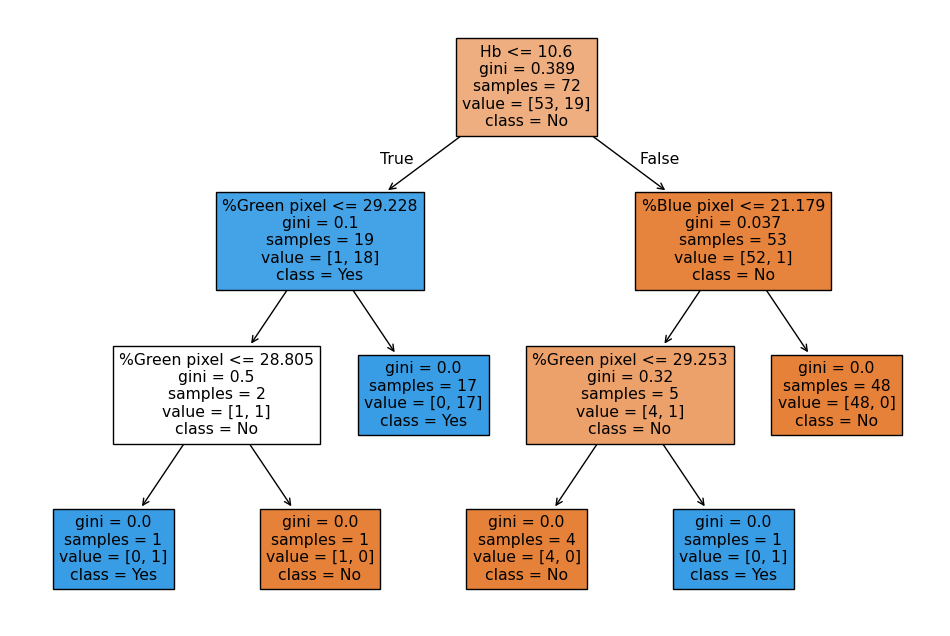

In [87]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

# Create a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot the Decision Tree
plt.figure(figsize=(12,8))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=clf.classes_)
plt.show()

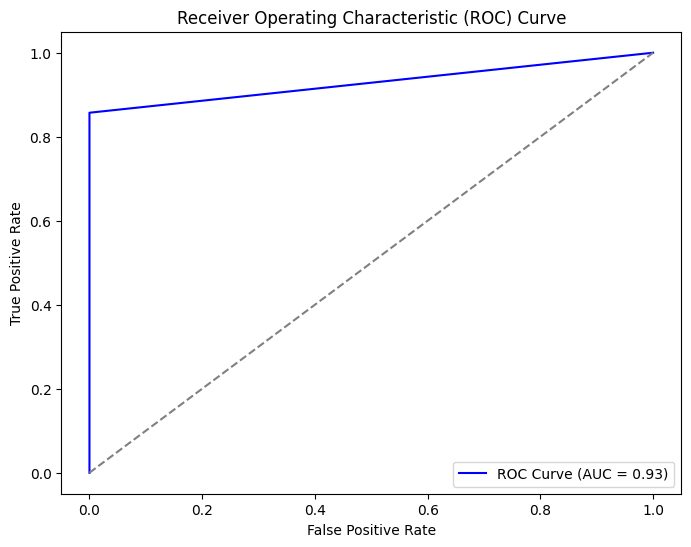

In [89]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC, specifying the positive label
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label='Yes')  # Specify 'Yes' as the positive class
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()